In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("Fert_data.csv")
df1.tail(20)


In [ ]:
df1.info()

In [ ]:
df1 = df1[pd.to_datetime(df1['Date'], format='%d-%b-%y', errors='coerce').notna()]

# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%b-%y')
values_array = df1['Value'].values
print(type(values_array))

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df1['Value'] = df1['Value'].astype(float)


In [ ]:
# Reset the index and convert 'Date' to a regular column
df1_reset = df1.reset_index()
df1_reset['Date'] = pd.to_datetime(df1_reset['Date'])

# Plot a line chart for the 'Value' column over time using pandas plot
plt.figure(figsize=(12, 6))
df1_reset.plot(x='Date', y='Value', kind='line')
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot a distribution of the 'Value' column
plt.figure(figsize=(10, 6))
df1_reset['Value'].plot(kind='hist', bins=20, density=True, alpha=0.7)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Plot a boxplot of the 'Value' column
plt.figure(figsize=(8, 6))
df1_reset.boxplot(column='Value')
plt.title('Boxplot of Value')
plt.ylabel('Value')
plt.show()

# Scatter plot between 'Date' and 'Value'
plt.figure(figsize=(12, 6))
plt.scatter(df1_reset['Date'], df1_reset['Value'], alpha=0.5)
plt.title('Scatter Plot between Date and Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Pairplot to visualize relationships between numerical columns
sns.pairplot(df1_reset)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1_reset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-1-0ebbc9eb829c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert 'Value' to numeric


<Figure size 864x432 with 0 Axes>

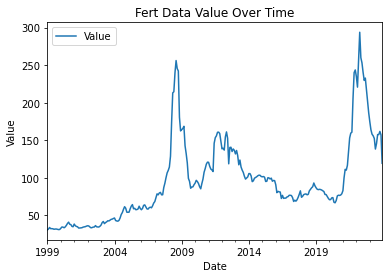

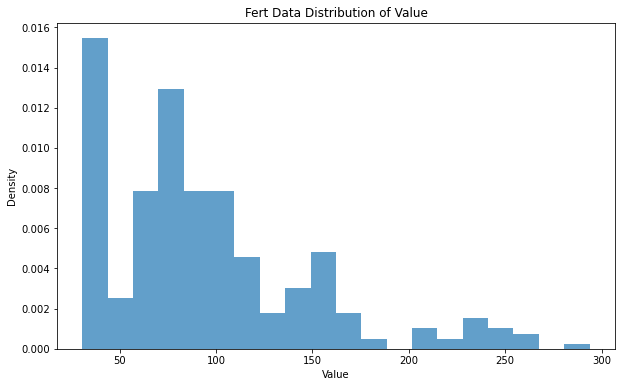

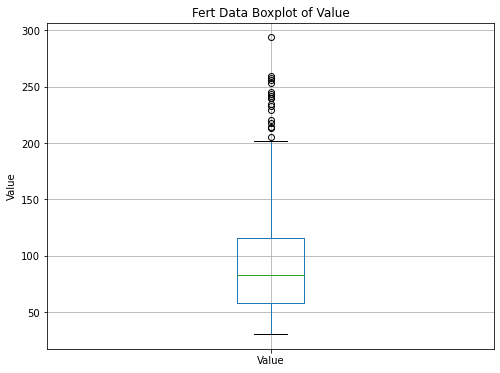

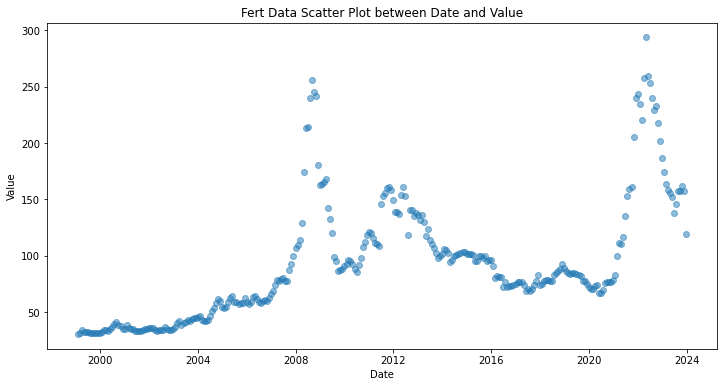

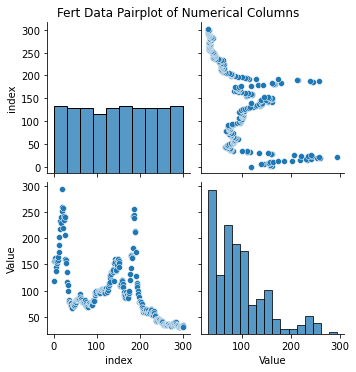

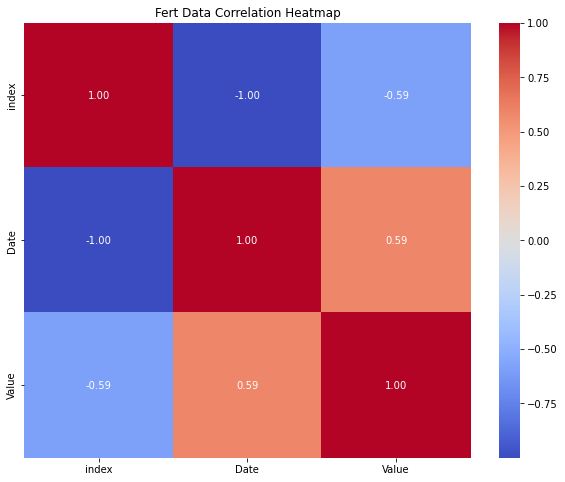

<Figure size 864x432 with 0 Axes>

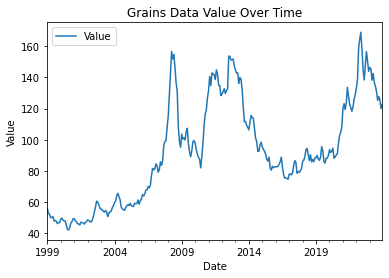

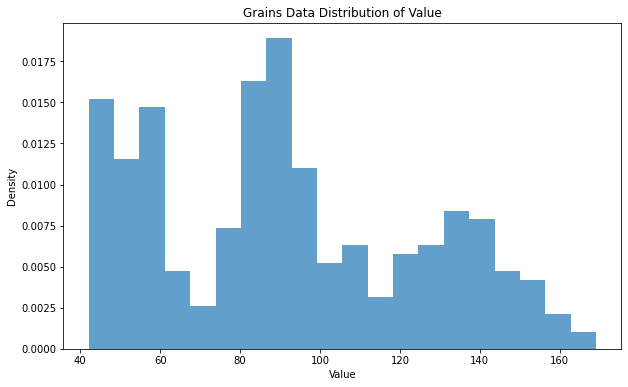

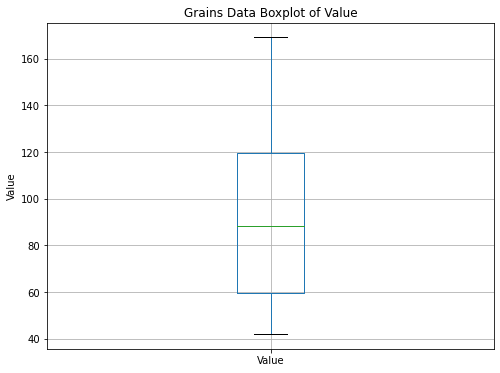

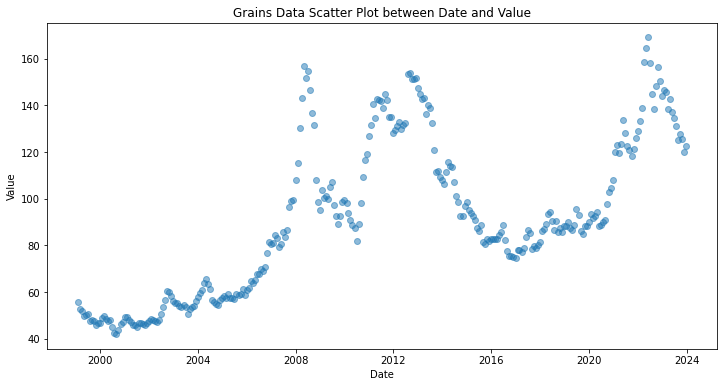

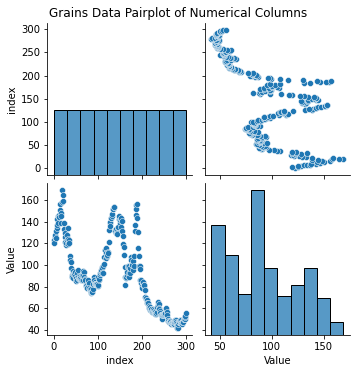

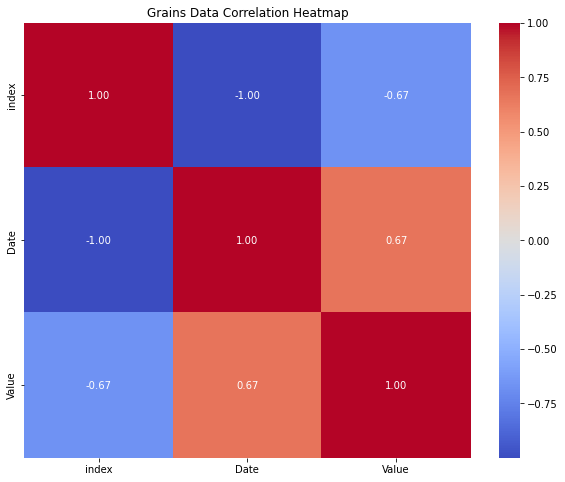

<Figure size 864x432 with 0 Axes>

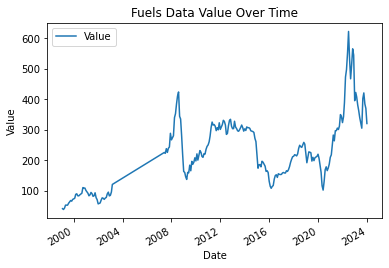

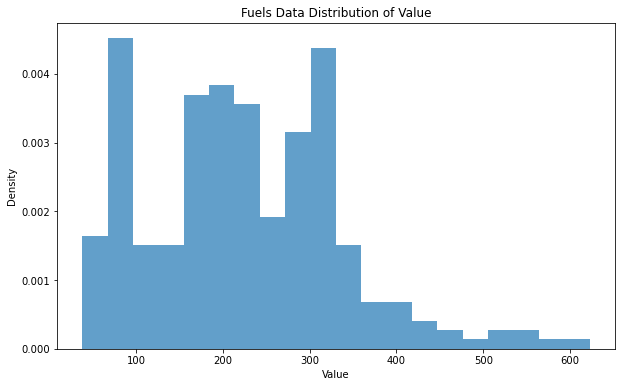

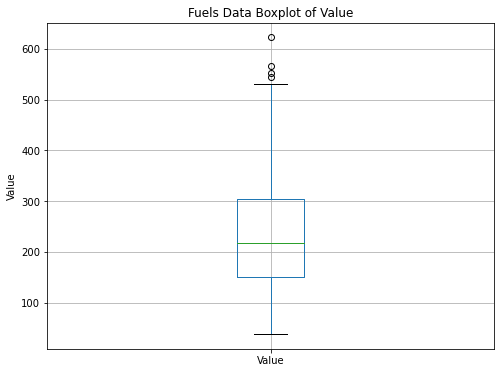

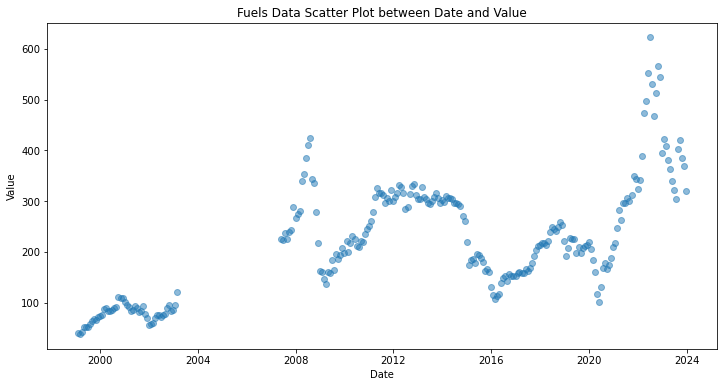

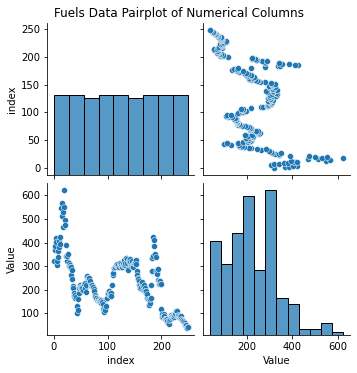

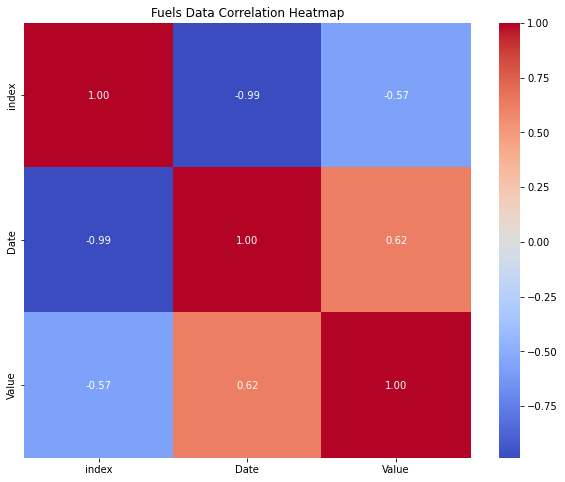

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to clean and process the dataframe
def process_dataframe(df):
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
    df = df.dropna(subset=['Date'])  # Drop rows with missing or invalid dates
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert 'Value' to numeric
    return df

# Function to reset index and convert 'Date' to a regular column
def reset_and_convert_date(df):
    df_reset = df.reset_index()
    df_reset['Date'] = pd.to_datetime(df_reset['Date'])
    return df_reset

# Function to perform EDA and plot visualizations
def perform_eda(df, title_prefix):
    # Plot a line chart for the 'Value' column over time using pandas plot
    plt.figure(figsize=(12, 6))
    df.plot(x='Date', y='Value', kind='line')
    plt.title(f'{title_prefix} Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

    # Plot a distribution of the 'Value' column
    plt.figure(figsize=(10, 6))
    df['Value'].plot(kind='hist', bins=20, density=True, alpha=0.7)
    plt.title(f'{title_prefix} Distribution of Value')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

    # Plot a boxplot of the 'Value' column
    plt.figure(figsize=(8, 6))
    df.boxplot(column='Value')
    plt.title(f'{title_prefix} Boxplot of Value')
    plt.ylabel('Value')
    plt.show()

    # Scatter plot between 'Date' and 'Value'
    plt.figure(figsize=(12, 6))
    plt.scatter(df['Date'], df['Value'], alpha=0.5)
    plt.title(f'{title_prefix} Scatter Plot between Date and Value')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

    # Pairplot to visualize relationships between numerical columns
    sns.pairplot(df)
    plt.suptitle(f'{title_prefix} Pairplot of Numerical Columns', y=1.02)
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{title_prefix} Correlation Heatmap')
    plt.show()

# Load and process the first dataset
df1 = pd.read_csv("Fert_data.csv")
df1 = process_dataframe(df1)
df1_reset = reset_and_convert_date(df1)
perform_eda(df1_reset, 'Fert Data')

# Load and process the second dataset
df2 = pd.read_csv('Grains.csv')
df2 = process_dataframe(df2)
df2_reset = reset_and_convert_date(df2)
perform_eda(df2_reset, 'Grains Data')

# Load and process the third dataset
df3 = pd.read_csv('Fuels.csv')
df3 = process_dataframe(df3)
df3_reset = reset_and_convert_date(df3)
perform_eda(df3_reset, 'Fuels Data')
